# Stroke Risk Prediction

## Problem Statement :
    To predict whether a patient is likely to get stroke or not.

## About Stroke :
    A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial.
    According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

## Task :
    We have to build a Machine Learning model that predicts whether a patient is likely to get stroke or not based on multiple features.

## About Dataset :
    This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
    
    Attribute Information :
    
        1) id: unique identifier
        2) gender: "Male", "Female" or "Other"
        3) age: age of the patient
        4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
        5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
        6) ever_married: "No" or "Yes"
        7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
        8) Residence_type: "Rural" or "Urban"
        9) avg_glucose_level: average glucose level in blood
        10) bmi: body mass index
        11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
        12) stroke: 1 if the patient had a stroke or 0 if not
    
    *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Acknowledgements
    (Confidential Source) - Use only for educational purposes
    Dataset Link : https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

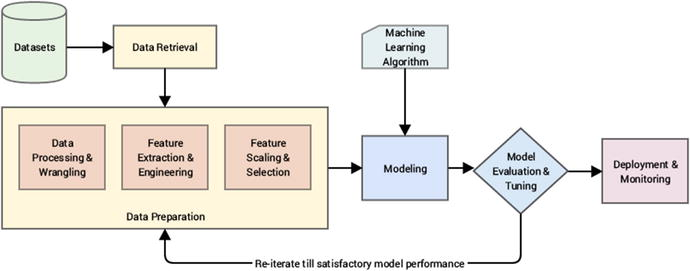

In [1]:
from IPython.display import Image
Image(r"C:\Users\Ninja Clasher\Desktop\Steps.jpg")

##### Importing Libraries

In [2]:
import numpy as np           # used for advanced mathematical opertion.
import pandas as pd          # used for analysing and handling data.

In [3]:
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# for ignoring warning
from warnings import filterwarnings
filterwarnings('ignore')

##### Importing Data

In [5]:
df = pd.read_csv(r'G:\Project\Stroke Prediction\Dataset\healthcare_stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.shape           # shape of dataset (i.e... 5110 records with 12 features columns)

(5110, 12)

In [7]:
df.info()          # Summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()       # Statistical data of the numerical features of a DataFrame

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.describe(include='O').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


## EDA (Exploratory Data Analysis)

##### Checking for Null values

In [10]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Checking Missing Values using " Bar Plot "

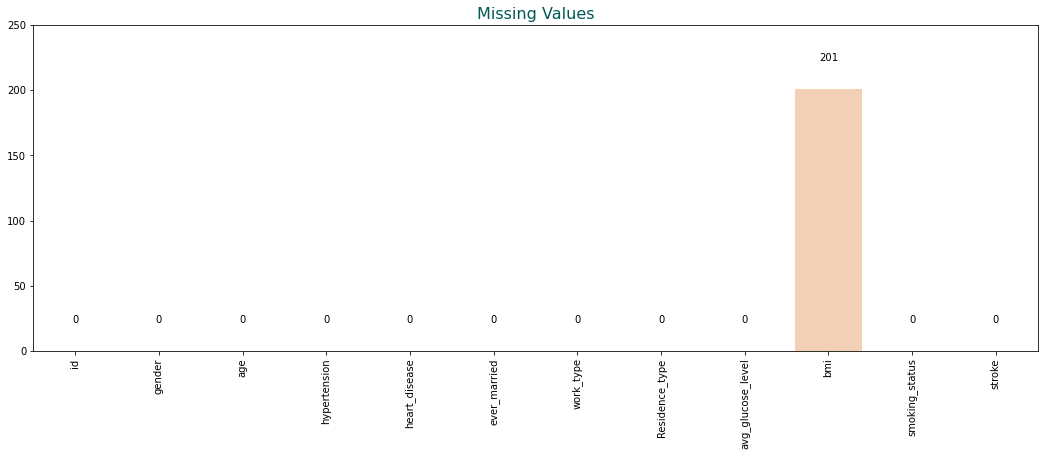

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(18,6))
g = sns.barplot(x=df.columns, y=df.isna().sum(), palette='Pastel2')
plt.xticks(rotation=90)
plt.title('Missing Values', size=16, color = '#025955')
g.set(ylim=(0,250))
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+20),ha='center', va='bottom',
               color= 'black')
    
plt.show()
plt.tight_layout()

##### Handling missing value using KNNImputer

In [12]:
from sklearn.impute import KNNImputer

In [13]:
imputer = KNNImputer(n_neighbors = 5)
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [14]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## Visualization

##### Visualizing the distribution of Stroke

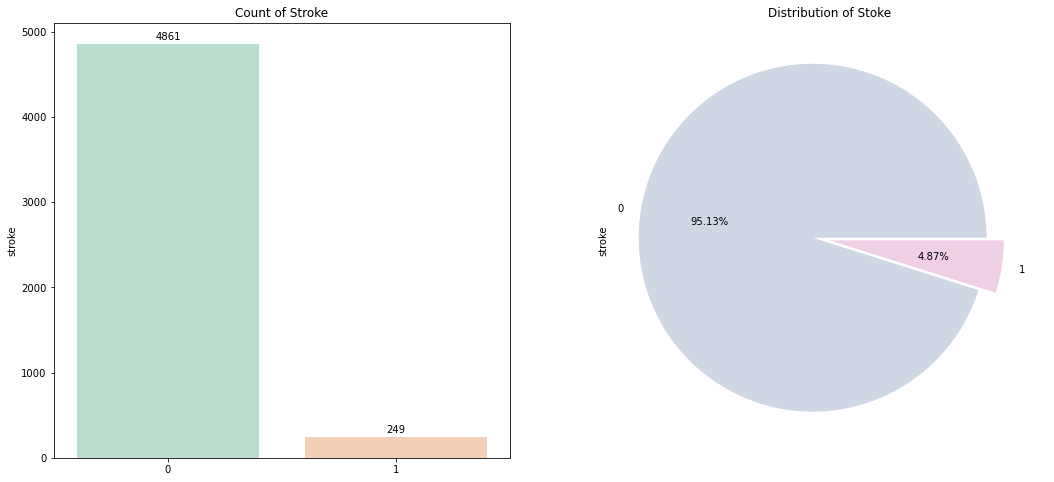

In [16]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
vc = df['stroke'].value_counts()
g = sns.barplot(x=vc.index,y=vc, palette='Pastel2')
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+20),ha='center', va='bottom',
               color= 'black')
plt.title('Count of Stroke')
plt.subplot(1,2,2)
colors = ['#CFD6E4', '#EFCFE3', '#E4F0CF', '#F3CFB6', '#B9DCCC']
df['stroke'].value_counts().plot(kind='pie', explode=[0.1,0], autopct='%.2f%%', colors=colors)
plt.title('Distribution of Stoke')
plt.show()

### About Target Feature ' Stroke '
    As we can see from above Countplot and Pie-plot that this feature column is absoultely im-balanced.
    We cannot give this columns directly to model building which will leads to mis-classification.
    So in order to make it balanced we need to use some sampling technique

In [17]:
col_num=[]
for x in df.columns:
    if (df[x].dtype=='int64') | (df[x].dtype == 'float64'):
        col_num.append(x)
col_num

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [18]:
cols = df[['age','hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000


### Checking whether data is Normal Distribution or not

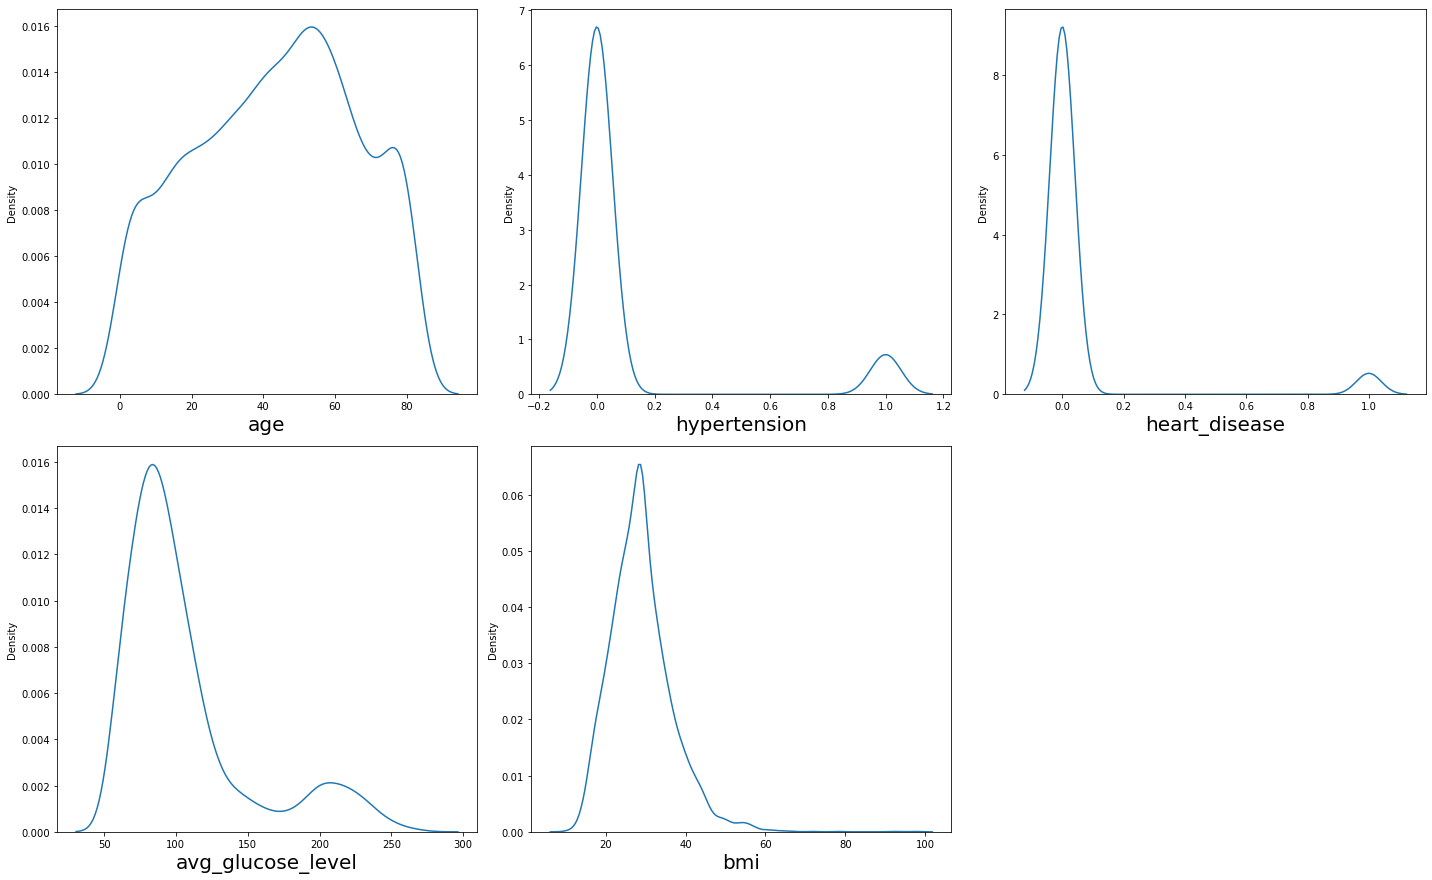

In [19]:
plt.figure(figsize=(20,30), facecolor = 'white')
plot = 1

for column in cols:
    if plot <= 15:
        ax = plt.subplot(5,3,plot)
        sns.kdeplot(cols[column])
        plt.xlabel(column,fontsize=20)
    
    plot = plot + 1
plt.tight_layout()

## Visualizing countplot for :
    gender
    ever_married
    work_type
    Residence_type
    smoking_status
    
      w.r.t their unique categories present in it.

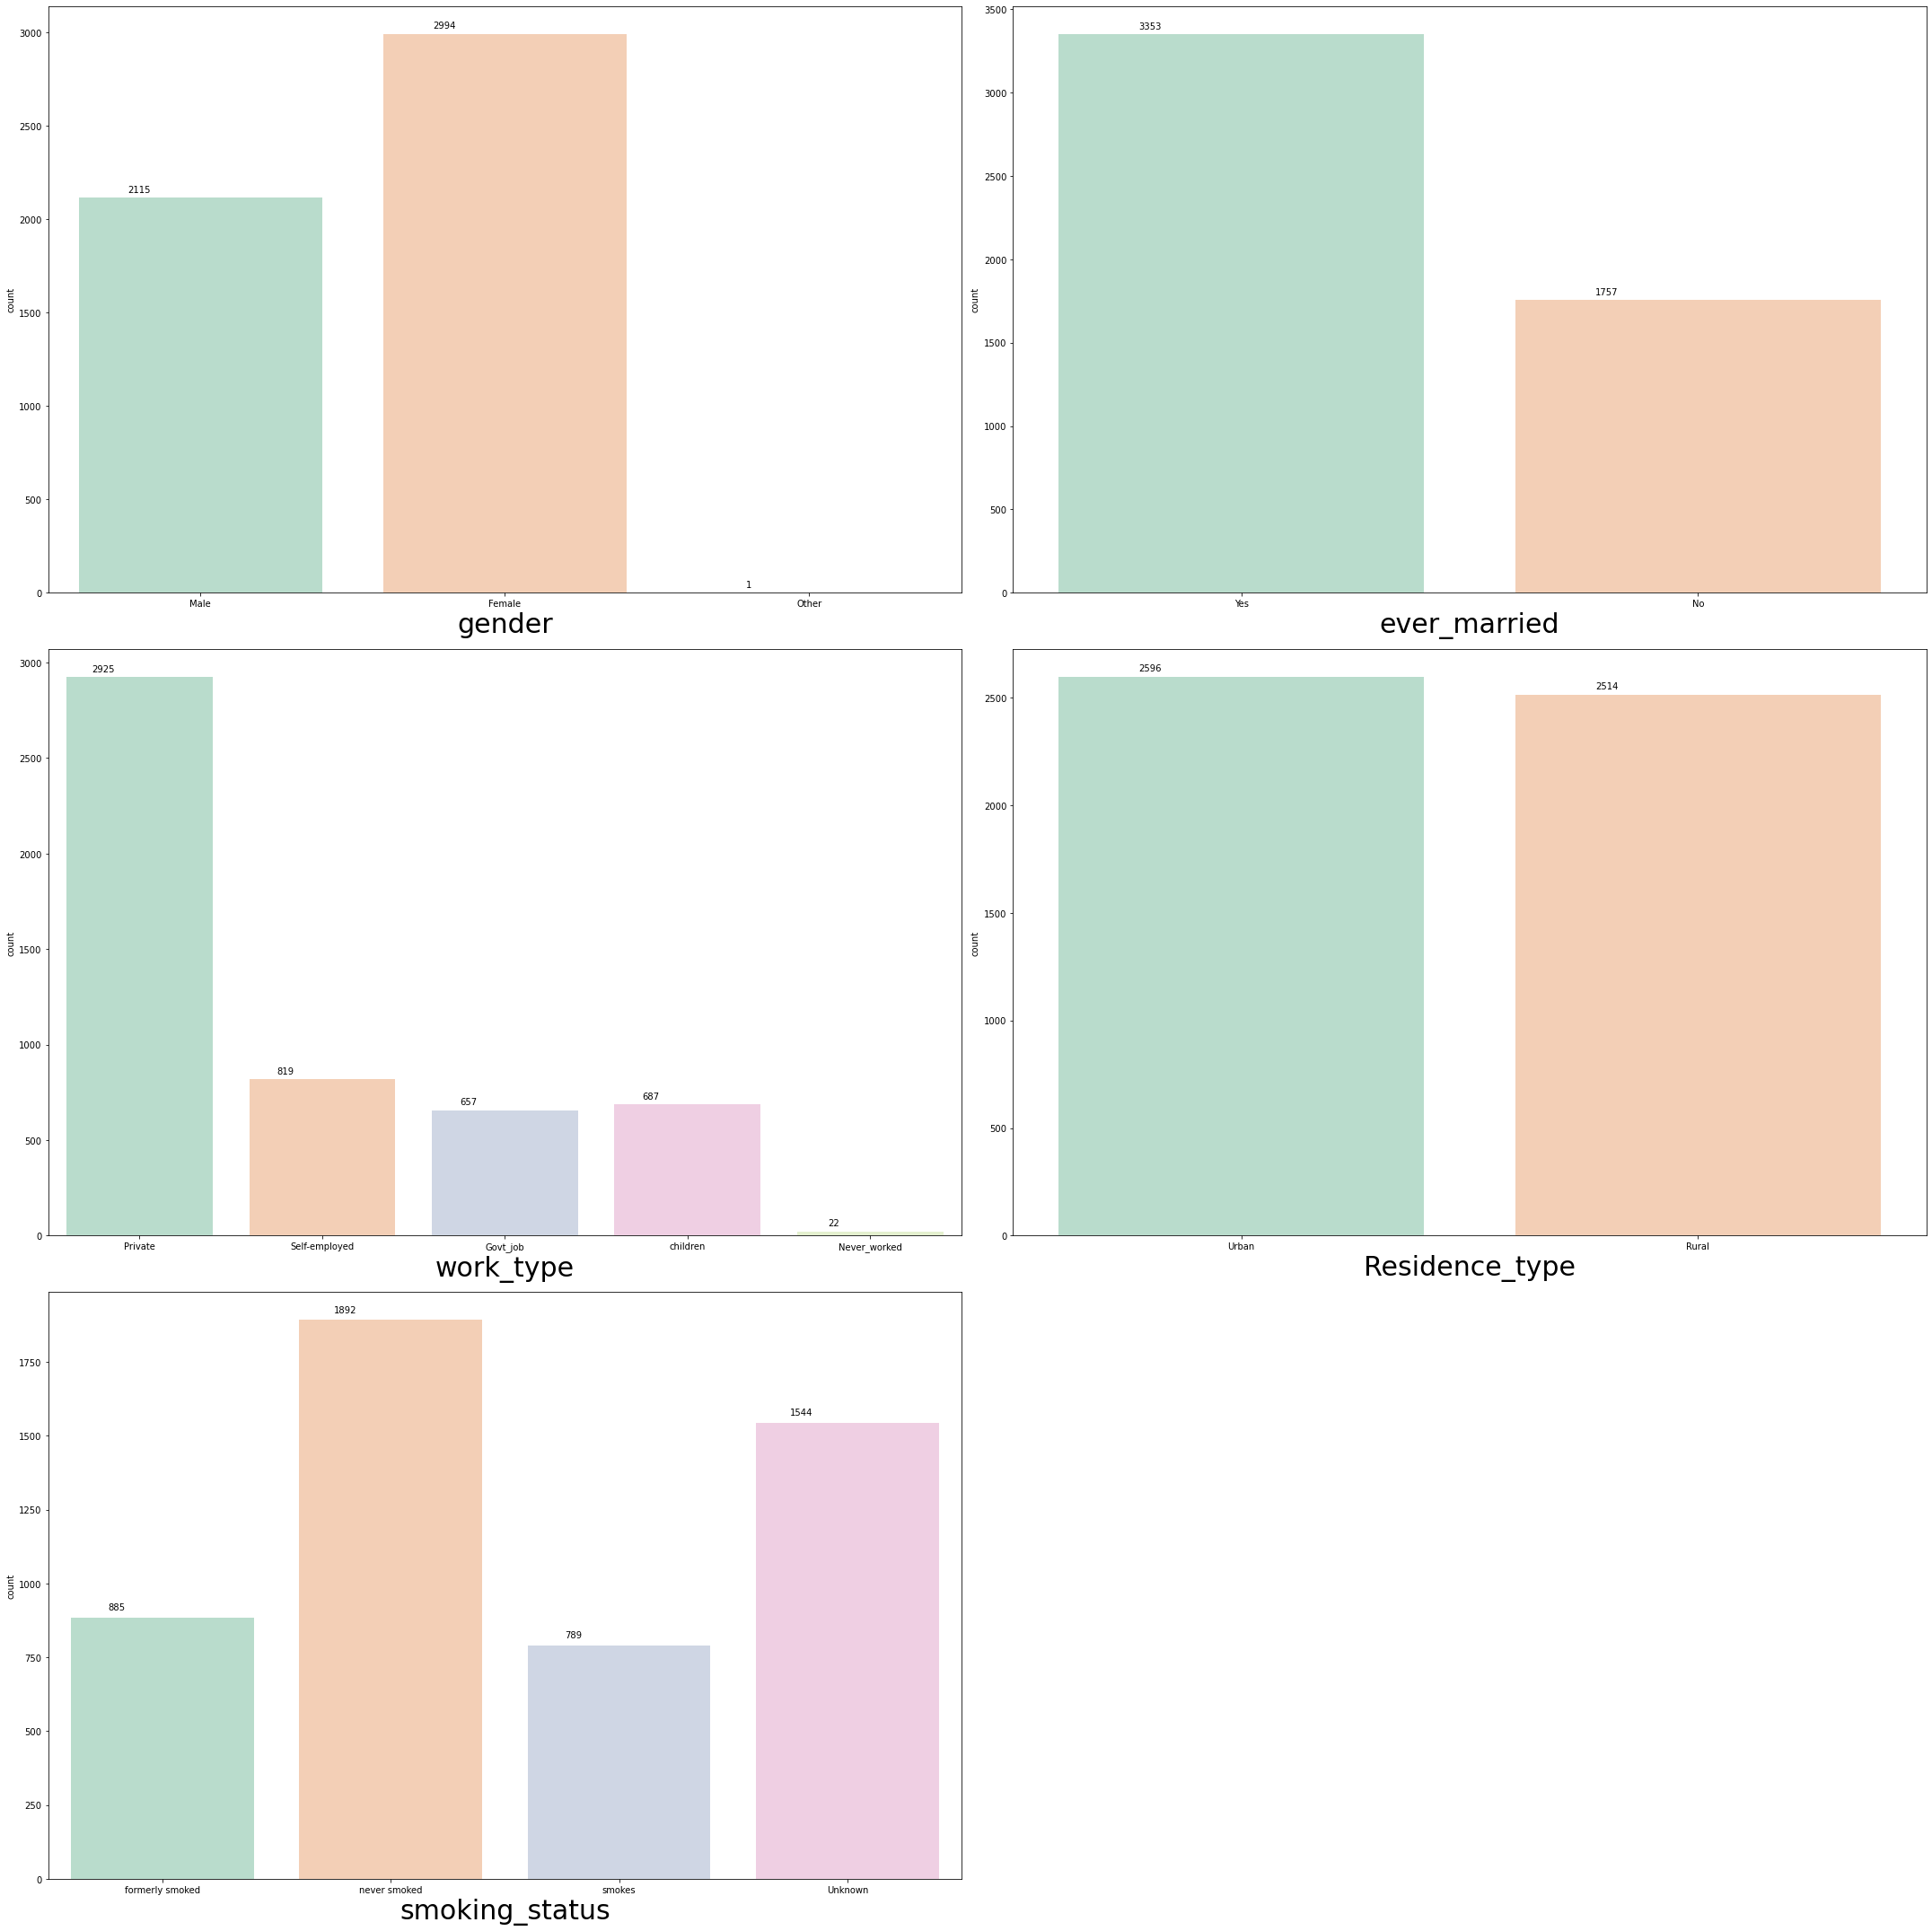

In [20]:
plt.figure(figsize=(30,30))

col= ['gender','ever_married','work_type','Residence_type','smoking_status']
i = 1
for a in col:
    
    plt.subplot(3,2,i)
    g = sns.countplot(x=a,data=df,palette='Pastel2')
    for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+20),ha='center', va='bottom',
                   color= 'black')
        plt.xlabel(a,fontsize=30)
    i = i+1
    
plt.tight_layout()

## Visualizing countplot for :
    gender
    ever_married
    work_type
    Residence_type
    smoking_status
    
      w.r.t stroke

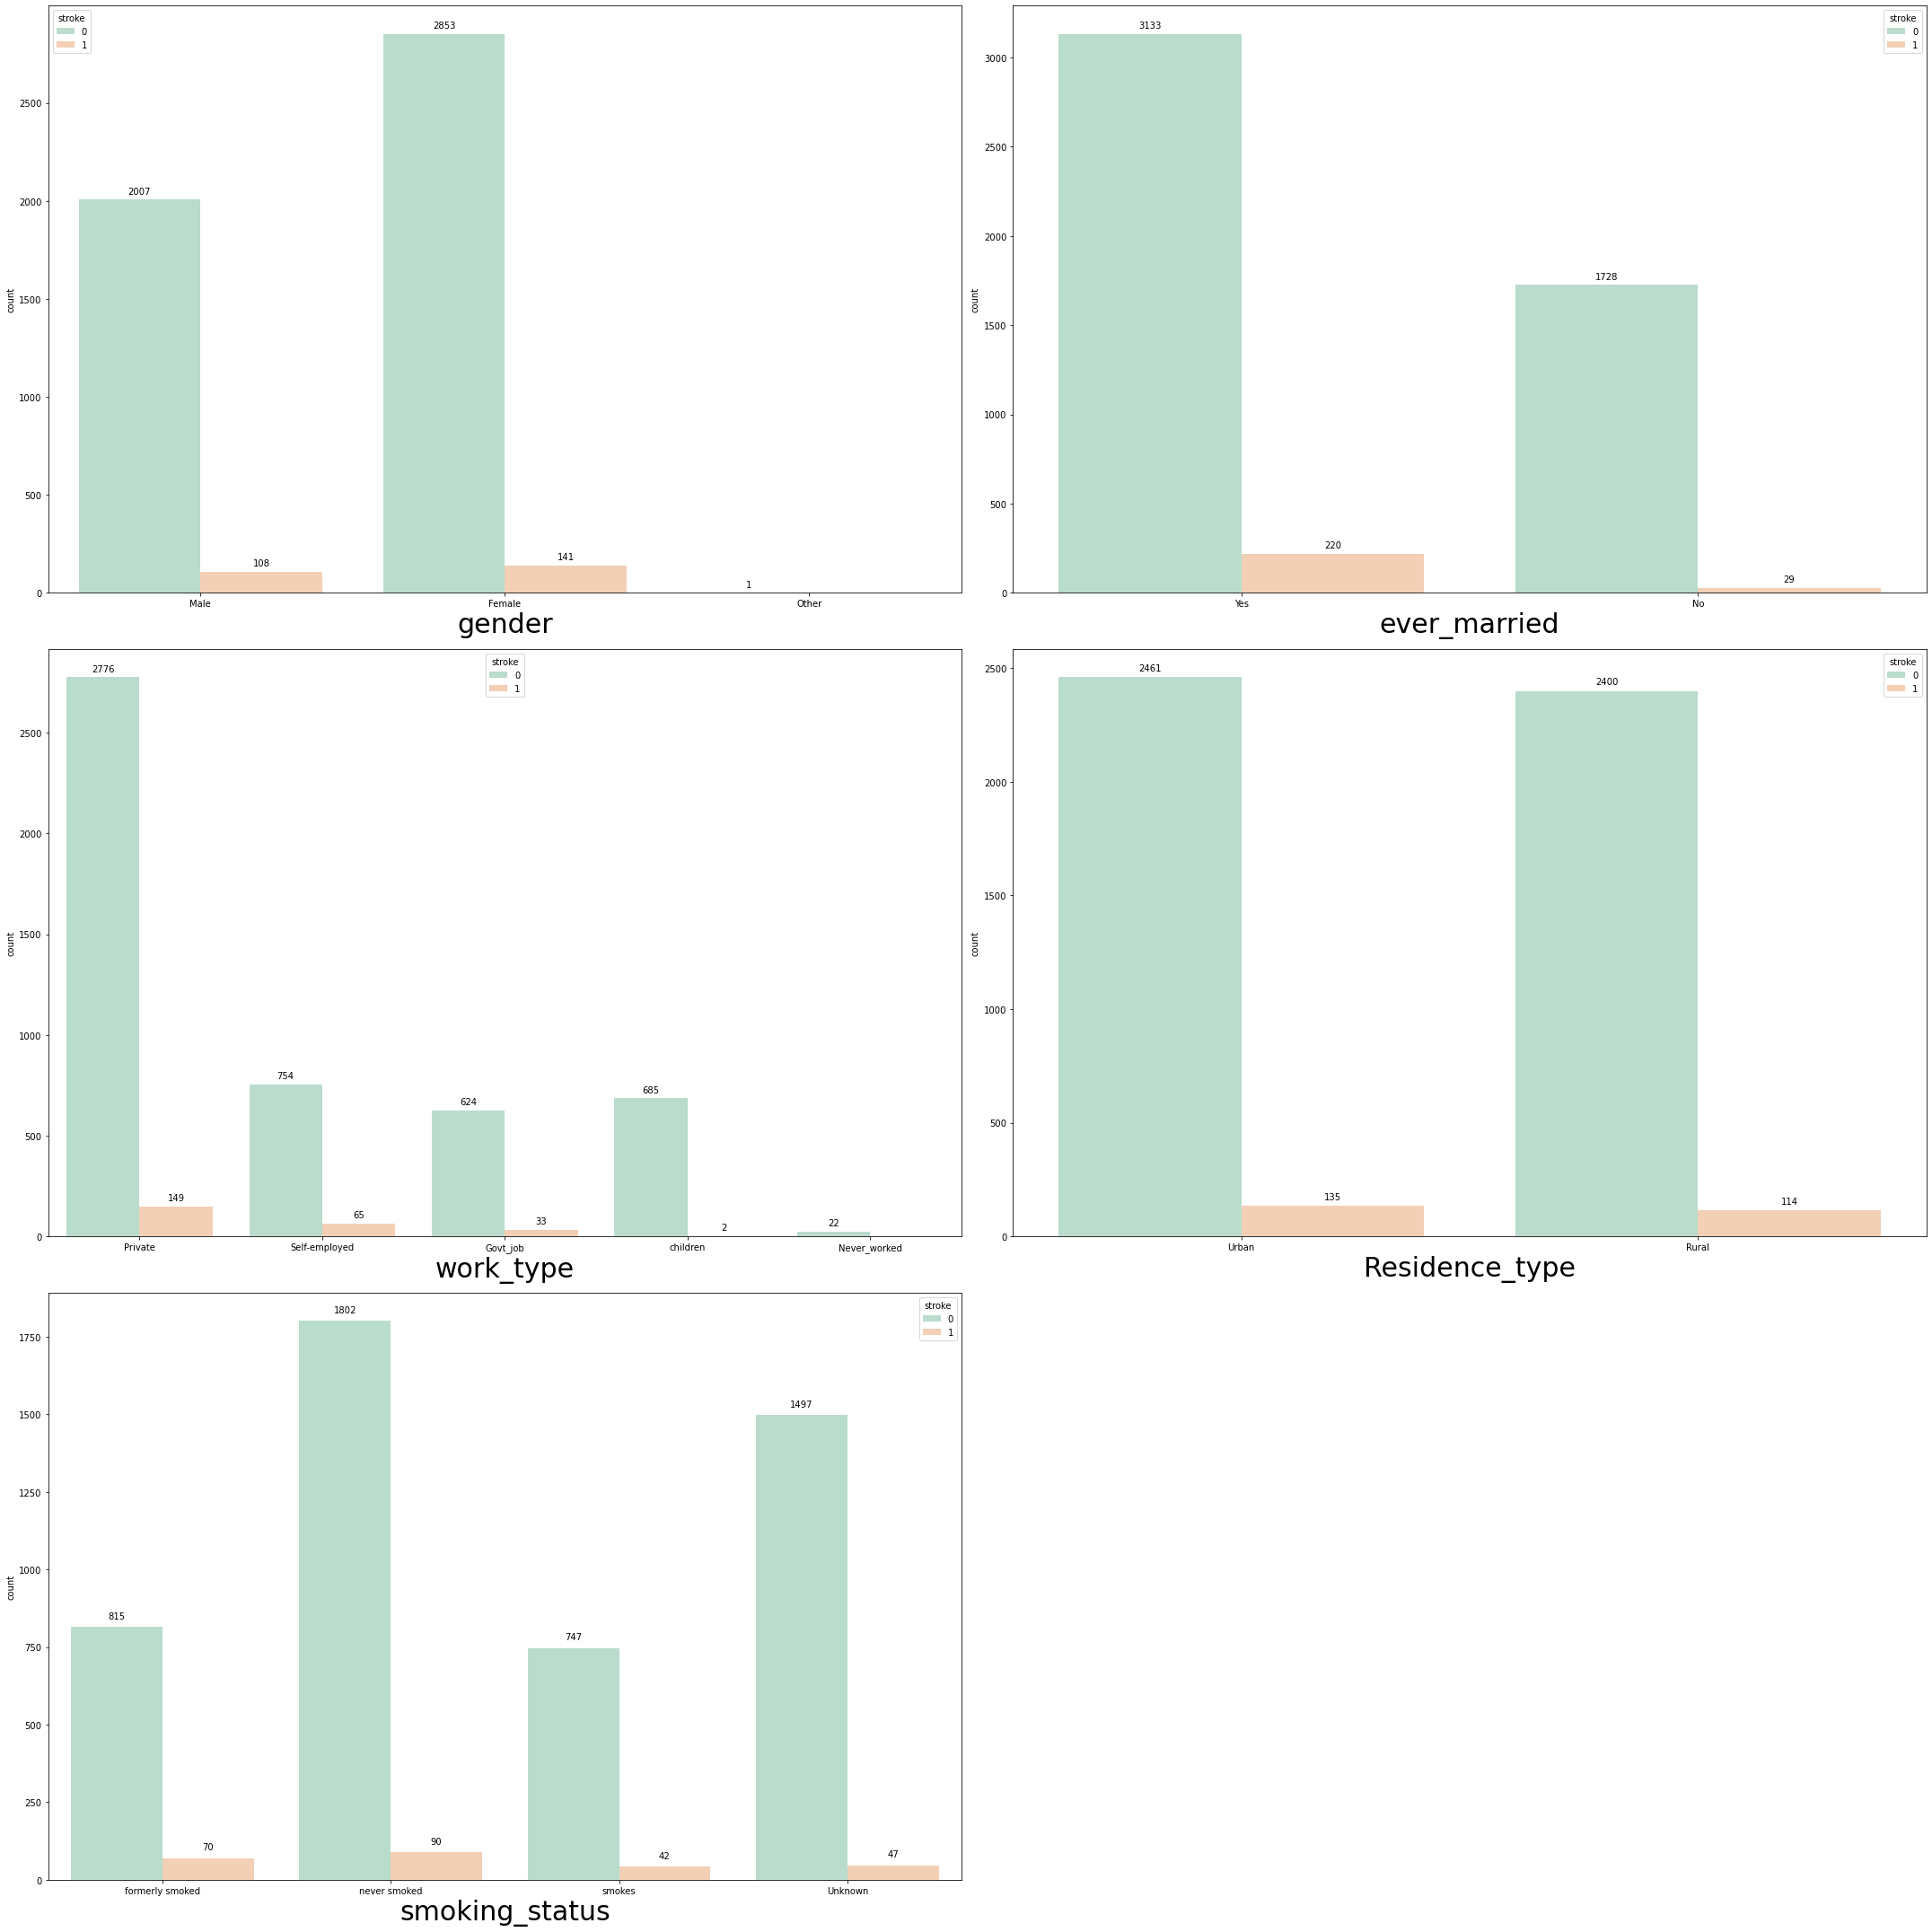

In [21]:

plt.figure(figsize=(30,30))

col= ['gender','ever_married','work_type','Residence_type','smoking_status']
i = 1
for a in col:
    
    plt.subplot(3,2,i)
    g = sns.countplot(x=a,hue='stroke',data=df,palette='Pastel2')
    for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+20),ha='center', va='bottom',
                   color= 'black')
        plt.xlabel(a,fontsize=30)
        
    i = i+1
    
plt.tight_layout()

## Visualizing countplot for :
    hypertension
    heart_disease
    
      w.r.t stroke

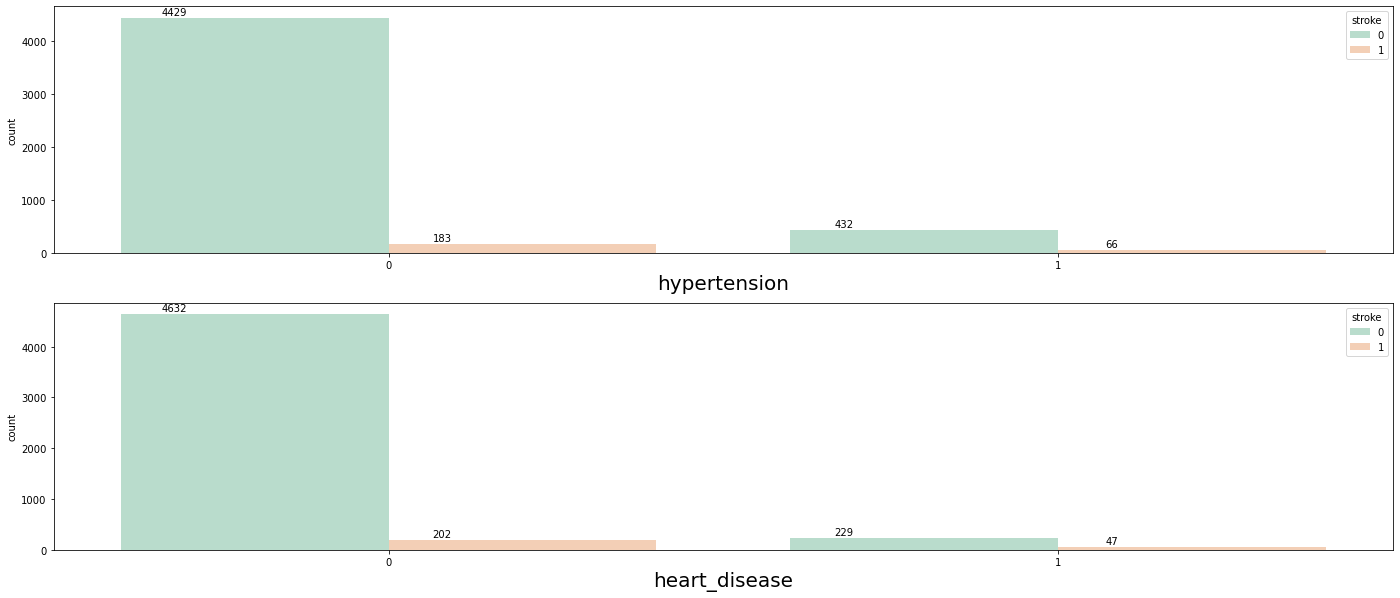

In [22]:

plt.figure(figsize=(24,10))

cols= ['hypertension', 'heart_disease']
i = 1
for a in cols:
    
    plt.subplot(2,1,i)
    g = sns.countplot(x=a,hue='stroke',data=df,palette='Pastel2')
    for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.08, p.get_height()+20),ha='center', va='bottom',
                   color= 'black')
        plt.xlabel(a,fontsize=20)
        
    i = i+1
    
#plt.tight_layout()

##### Pandas Profiling

In [23]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file(output_file='stroke.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Pre-processing

##### Handling Categorical Data

##### Coverting categorical features into numerical using Dummy 

In [24]:
gender = pd.get_dummies(df[['gender']] , drop_first=True)
married = pd.get_dummies(df[['ever_married']] , drop_first=True)
work = pd.get_dummies(df[['work_type']] , drop_first=True)
residence = pd.get_dummies(df[['Residence_type']] , drop_first=True)
smoking = pd.get_dummies(df[['smoking_status']] , drop_first=True)

In [25]:
categorical_features = []
for x in df.columns:
    if df[x].dtype=='object':
        categorical_features.append(x)
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [26]:
# concatinating columns
data = pd.concat([df,gender,married,work,residence,smoking] , axis =1 )
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0,1,0,0,1,0,0,0,1,0


##### Dropping unnecessary features which will not help while building the model

In [27]:
data = data.drop(columns = categorical_features , axis = 1)
data = data.drop(columns = 'id' , axis = 1)

In [28]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


##### Correlation

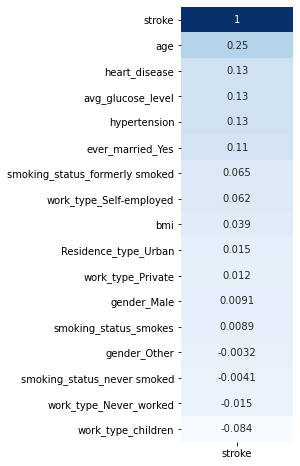

In [29]:
corr = data.corr()['stroke'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False , annot=True)
plt.show()

## Scaling Data

### Using StandardScaler to scale the train and test sets into scaled versions.
    Scaling is used to ensure uniformity across the dataset ( means... not to get bais on certain features )
    We need to fit as well as transform for training part
    And for testing part we only need to transform the data

In [30]:
x = data.drop('stroke' , axis = 1)
y = data['stroke']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [32]:
print(x.shape)
print(y.shape)

(5110, 16)
(5110,)


##### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33 , random_state = 42)  

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3423, 16)
(3423,)
(1687, 16)
(1687,)


## Building Model

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)

In [36]:
lg.score(x_test,y_test)

0.943687018375815

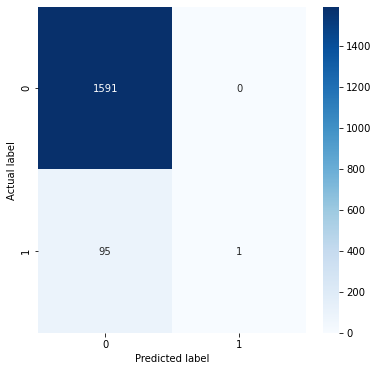

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       1.00      0.01      0.02        96

    accuracy                           0.94      1687
   macro avg       0.97      0.51      0.50      1687
weighted avg       0.95      0.94      0.92      1687

Accuracy of The Model : 94.3687018375815


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(y_test,y_pred))
print("Accuracy of The Model :",accuracy_score(y_test,y_pred)*100)

### SMOTE 
    Synthetic Minority Oversampling Technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [38]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

x_sm , y_sm = sm.fit_resample(x,y)

In [39]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.33 , random_state = 42)  

### Logistic Regression using SMOTE

In [40]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)

In [41]:
lg.score(x_test,y_test)

0.7909005920847616

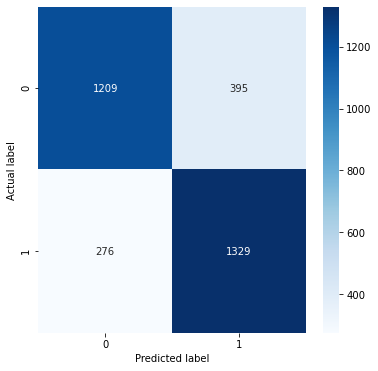

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1604
           1       0.77      0.83      0.80      1605

    accuracy                           0.79      3209
   macro avg       0.79      0.79      0.79      3209
weighted avg       0.79      0.79      0.79      3209

Accuracy of The Model : 79.09005920847616


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(y_test,y_pred))
print("Accuracy of The Model :",accuracy_score(y_test,y_pred)*100)

### Suport Vector Classifier

In [43]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [44]:
model.score(x_test,y_test)

0.8585229043315674

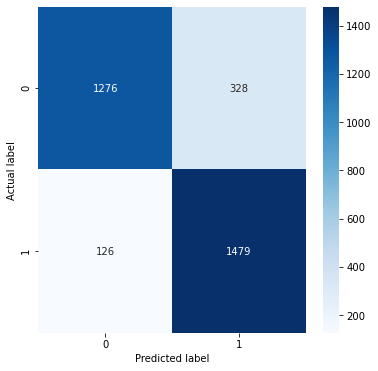

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1604
           1       0.82      0.92      0.87      1605

    accuracy                           0.86      3209
   macro avg       0.86      0.86      0.86      3209
weighted avg       0.86      0.86      0.86      3209

Accuracy of The Model : 85.85229043315674


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(y_test,y_pred))
print("Accuracy of The Model :",accuracy_score(y_test,y_pred)*100)

## GridSearchCV

### Using GridSearchCV to find best parameter for SVC (Tuning SVC)

In [46]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0.1 , 1 , 10 , 100 , 1000],
    'gamma' : [1 , 0.1 , 0.01 , 0.001 , 0.0001],
    'kernel' : ['rbf']
}

grid = GridSearchCV(SVC() , param_grid , refit = True , verbose = 3)

grid.fit(x_train , y_train)
'''

"\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    'C' : [0.1 , 1 , 10 , 100 , 1000],\n    'gamma' : [1 , 0.1 , 0.01 , 0.001 , 0.0001],\n    'kernel' : ['rbf']\n}\n\ngrid = GridSearchCV(SVC() , param_grid , refit = True , verbose = 3)\n\ngrid.fit(x_train , y_train)\n"

In [47]:
# grid.best_params_

### Best parameter we get for SVC
    C : 10
    gamma : 1
    kernel : rbf

### Applying SVC with best parameter we get from GridSearchCV

In [48]:
from sklearn.svm import SVC
model = SVC(C=10 , gamma = 1 , kernel = 'rbf')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [49]:
model.score(x_test,y_test)

0.9460891243377999

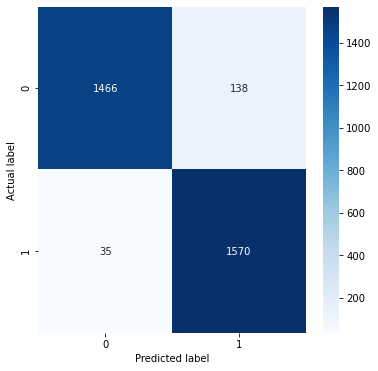

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1604
           1       0.92      0.98      0.95      1605

    accuracy                           0.95      3209
   macro avg       0.95      0.95      0.95      3209
weighted avg       0.95      0.95      0.95      3209

Accuracy of The Model : 94.60891243377999


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(y_test,y_pred))
print("Accuracy of The Model :",accuracy_score(y_test,y_pred)*100)

### Saving Model

In [51]:
import pickle
with open('model_pickle.pkl' , 'wb') as file :
    pickle.dump(model , file)